# Farm information visualizations

## Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
# load data
df = pd.read_csv('../../data/raw/rawdata_new.csv')

In [3]:
def print_column_range(df, col_name):
    print(f'Range: {df[col_name].min()} to {df[col_name].max()}')

## Farm information

### How old are the farms?

Range: 29.0 to 66.0


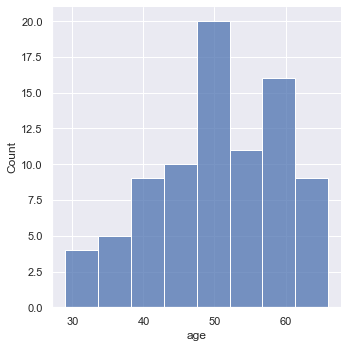

In [4]:
print_column_range(df, 'age')
sns.displot(data=df, x='age')

The farms vary from 29 to 66 in age. Curiously, there isn't a unit provided in the codebook. I'm guessing it's years.

### What types of farms are there?

In [5]:
df['farmtype'].value_counts(dropna=False)

Livestock            61
Arable farming       23
Others                9
Specialized crops     9
NaN                   3
Name: farmtype, dtype: int64

There are four farm types: livestock, arable farming, others, and specialized crops. Most farms are livestock farms.

In [6]:
df['farmtype'].value_counts(dropna=False)/len(df)

Livestock            0.580952
Arable farming       0.219048
Others               0.085714
Specialized crops    0.085714
NaN                  0.028571
Name: farmtype, dtype: float64

58% of the farms are livestock farms. 21% of the farms are arable farming farms. 8% are specialized crop farms, and 8% are other farms. 2% have no farm type.

<AxesSubplot:xlabel='arable_land', ylabel='animal_unit'>

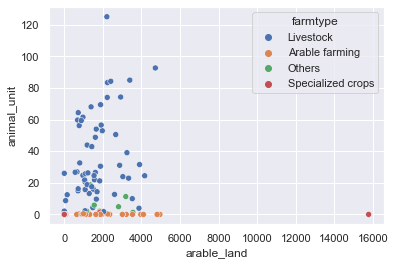

In [7]:
sns.scatterplot(data=df, x='arable_land', y='animal_unit', hue='farmtype')

All farms with >20 animal units are classified as livestock farm type. Farms with <5 animal units are usually arable farming farm type. Livestock and Arable farming farms vary from 0 to 60 hectares of arable land.

### How big are farms in terms of livestock and arable land?

Range: 0 to 15779
Range: 0.0 to 124.9788


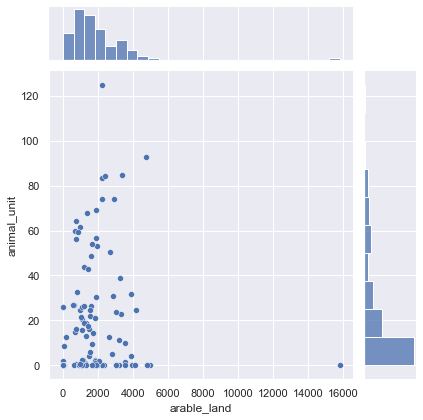

In [8]:
print_column_range(df,'arable_land')
print_column_range(df,'animal_unit')
sns.jointplot(data=df, x='arable_land', y='animal_unit')

Farms have 0 to 157.79 hectares of arable land. Farms have 0 to 124.9 livestock animals. I wonder how the livestock column can have a non-integer entry...

### How does arable land compare to total land?

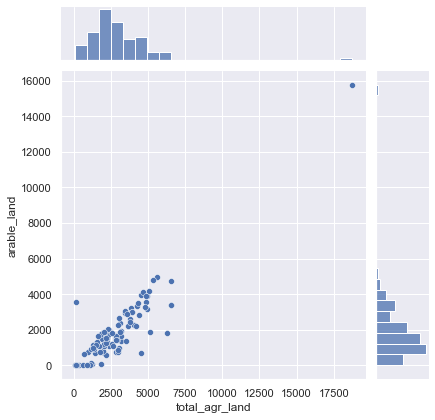

In [9]:
sns.jointplot(data=df, x='total_agr_land', y='arable_land')

It's a pretty linear relationship between total agricultural land and arable land. There are a couple farms that have lots of agricultural land with little arable land. There is one farm that I'm guessing was entered into the database incorrectly, since it has more arable land than it has total agricultural land.

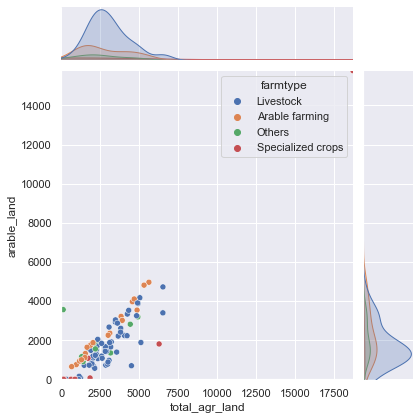

In [10]:
sns.jointplot(data=df, x='total_agr_land', y='arable_land', hue='farmtype', xlim=(0,max(df['total_agr_land'])), ylim=(0,max(df['arable_land'])))

Farms that are classified as arable farming type have a higher ratio of arable land to total agricultural land. Farms that are classified as livestock have a lower ratio of arable land to total agricultural land.

### How big are the farms in terms of workforce?

Range: 0.13728 to 63.73227


<AxesSubplot:xlabel='workforce', ylabel='Count'>

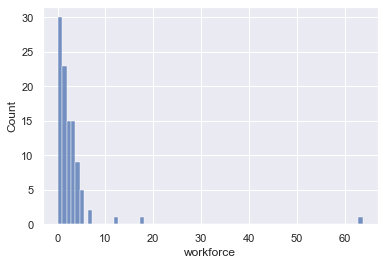

In [11]:
print_column_range(df,'workforce')
sns.histplot(data=df, x='workforce')

Farms range from 0.1 to 63.7 standard workforce units. There is an inverse relationship between the number of farms and the size of the workforce; most farms have a small work force, a few farms have a large workforce.

### How is workforce related to farm type?

<AxesSubplot:xlabel='workforce', ylabel='Count'>

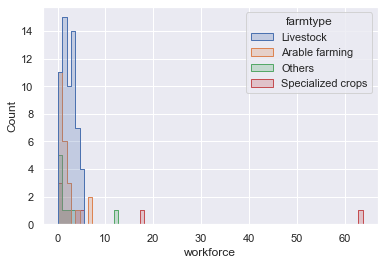

In [12]:
sns.histplot(data=df, x='workforce', hue='farmtype', element='step')

It looks like livestock farms have a larger workforce than arable farming farms.

### How is workforce related to arable land and livestock?

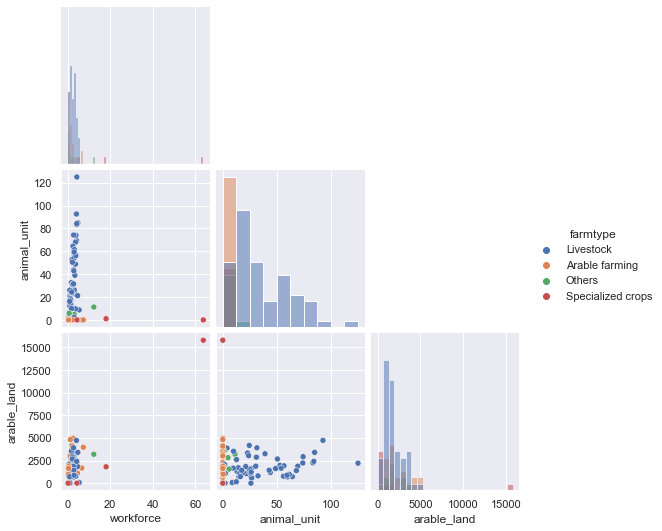

In [13]:
sns.pairplot(data=df[['workforce','animal_unit','arable_land','farmtype']], hue='farmtype', diag_kind='hist', corner=True)

It looks like workforce has a positive relationship with animal units and arable land, but it's tough to tell with the others and specialized crops farm types.

<AxesSubplot:xlabel='workforce', ylabel='arable_land'>

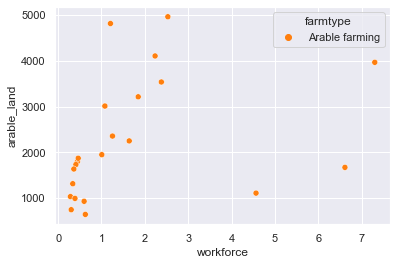

In [14]:
sns.scatterplot(data=df[df['farmtype']=='Arable farming'], x='workforce',y='arable_land', hue='farmtype', palette={'Arable farming':'tab:orange'})

<AxesSubplot:xlabel='workforce', ylabel='arable_land'>

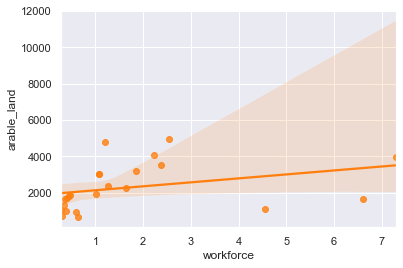

In [15]:
sns.regplot(data=df[df['farmtype']=='Arable farming'], x='workforce', y='arable_land', color='tab:orange')

It looks like there is a positive linear relationship between workforce and arable land for arable farming farms. A linear regression overfits, though, to three farms that have over double the workforce of the other arable farming farms.

<AxesSubplot:xlabel='workforce', ylabel='animal_unit'>

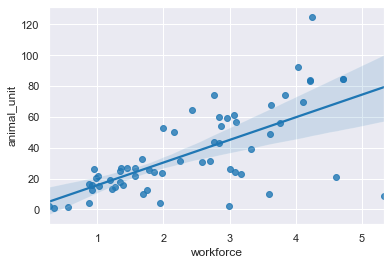

In [16]:
sns.regplot(data=df[df['farmtype']=='Livestock'], x='workforce', y='animal_unit', color='tab:blue')

It looks like there is a positive linear relationship between workforce and animal unit for livestock farms.

### How many farms comply with organic farming ordinance?

In [17]:
df['organic'].value_counts(dropna=False)

0.0    90
1.0    11
NaN     4
Name: organic, dtype: int64

Most farms do not comply with the organic farming ordinance.

### How many farms comply with proof of ecological performance?

In [18]:
df['eco_proof'].value_counts(dropna=False)

1.0    98
0.0     4
NaN     3
Name: eco_proof, dtype: int64

Most farms do comply with the proof of ecological performance federal regulations.

### How many farmers are part of AgroCO2ncept?

In [19]:
df['agroconcept'].value_counts(dropna=False)

0    81
1    24
Name: agroconcept, dtype: int64

Most farmers are not a part of AgroCO2ncept.

These last three metrics, looking at organic, ecological, and carbon minded farming techniques, seem like they could be aggregated into a measure for environmental-mindedness. That said, I don't know much about Swedish farming regulations, so maybe that's an inaccurate assumption - farmers could join these programs for other reasons or incentives, not just beccause they care about the planet.